# Практическое занятие №3

Выполнил: *Грибков А.С.*

Группа: *ИКБО-16-22*

## 1. Модули

**1.1.** (уровень сложности: простейший)

Напишите код, состоящий из двух модулей, для получения следующего сообщения об ошибке:

```
AttributeError: partially initialized module '...' has no attribute '...' (most likely due to a circular import)
```

**Решение:**

[main.py](part1/task1/main.py): 

```python
from random import rand, randint


def randint(a, b):
    return randint(a, b)


if __name__ == '__main__':
    main()
```

[random.py](part1/task1/random.py):

```python
import main as random

rand = random.randint(1, 10)

def main():
    print(random.randint(1, 10))

if __name__ == '__main__':
    main()
```

**1.2.** (уровень сложности: простейший)

Как вы думаете, модуль загружается один раз или же загружается каждый раз при очередном импорте? Докажите правильность вашей гипотезы примером кода.

**Решение:**

Импортируется только один раз.

[main.py](part1/task2/main.py):

```python
print("Hello World!")
```

In [78]:
for _ in range(10):
    import part1.task2.main

**1.3.** (уровень сложности: простейший)

Предположим, мы хотим изменить значение глобальной переменной модуля, но так, чтобы новое значение отразилось на всех пользователях этого модуля. К чему приведет следующий код? Что можно предложить взамен?

```Python
from some_module import GLOBAL_VAR
GLOBAL_VAR = 42
```

**Решение:**

Изменяется, но только локально.

[main.py](part1/task3/main.py):

```python
GLOBAL_VAR = 8


def get_global_var():
    return GLOBAL_VAR

```

In [79]:
from part1.task3.main import GLOBAL_VAR, get_global_var

print("Before:")
print(GLOBAL_VAR)
print(get_global_var())
print()

GLOBAL_VAR = 42

print("After:")
print(GLOBAL_VAR)
print(get_global_var())
print()

Before:
8
8

After:
42
8


**1.4.** (уровень сложности: простейший)

Неконтролируемый импорт с помощью *, как известно, в Питоне не поощряется. Попробуйте сделать его контролируемым со стороны модуля. Использование звездочки не должно приводить к импорту всех глобальных имен вашего модуля.

**Решение:**

[main.py](part1/task4/main.py):

```python
__all__ = ['var1', 'fun1']

var1 = 1
var2 = 2


def fun1():
    print("fun1")


def fun2():
    print("fun2")
```

In [80]:
from part1.task4.main import *

print(var1)
fun1()

try:
    print(v2)
except Exception as e:
    print(e)
try:
    fun2()
except Exception as e:
    print(e)

1
fun1
name 'v2' is not defined
name 'fun2' is not defined


## 2. Процедурная графика

**2.1.** (уровень сложности: средний)

Создайте генератор случайных спрайтов 5x5 пикселей. Используйте свойство симметрии. Вывод реализуйте с помощью функции imshow.

Пример работы генератора показан ниже.

![](../../../data/sprite1.png)

**Решение:**

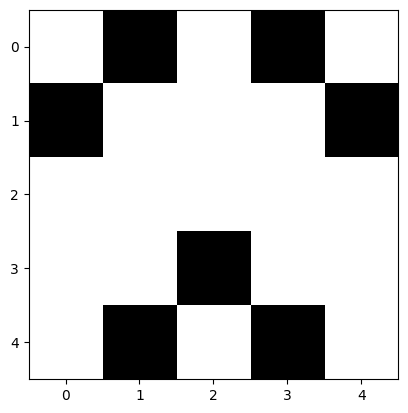

In [81]:
import matplotlib.pyplot as plt
import numpy as np

SIZE = 5

sprite = np.random.randint(0, 2, size=(SIZE, SIZE))
sprite = np.maximum(sprite, list(map(lambda line: line[::-1], sprite)))
plt.imshow(sprite, cmap='gray')
plt.show()

**2.2.** (уровень сложности: средний)

Создайте генератор карт спрайтов. Пример работы этого генератора показан ниже.


![](../../../data/sprite2.png)

**Решение:**

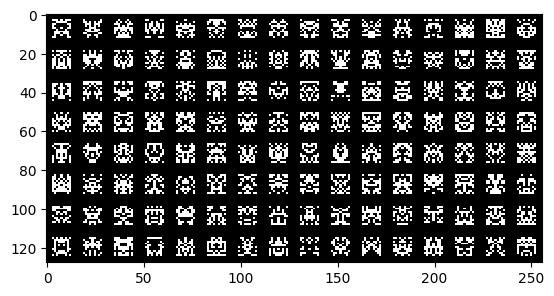

In [82]:
from random import randint

ROW_SIZE = 16
COLUMN_SIZE = 8
SPACE = 3
SIZE = 10

s = SIZE + SPACE * 2

sprites = np.zeros(s * s * COLUMN_SIZE * ROW_SIZE).reshape(s * COLUMN_SIZE, s * ROW_SIZE)
for i_column in range(COLUMN_SIZE):
    for i_row in range(ROW_SIZE):
        for i in range(SIZE):
            for j in range(SIZE):
                sprites[i_column * s + i + SPACE][i_row * s + j + SPACE] = randint(0, 1)
                sprites[i_column * s + i + SPACE][i_row * s + (s - SPACE) - j - 1] = sprites[i_column * s + i + SPACE][
                    i_row * s + j + SPACE]

plt.imshow(sprites, cmap='gray', interpolation='none')
plt.show()

**2.3.** (уровень сложности: высокий)

Реализуйте генератор случайных спрайтов NxM. Используйте различные свойства симметрии. Добавьте цвета.

Пример работы этого генератора показан ниже.


![](../../../data/sprite3.png)

Использовалась палитра из PICO-8:

```
1D2B53
7E2553
008751
AB5236
5F574F
C2C3C7
FFF1E8
FF004D
FFA300
FFEC27
00E436
29ADFF
83769C
FF77A8
FFCCAA
```

**Решение:**

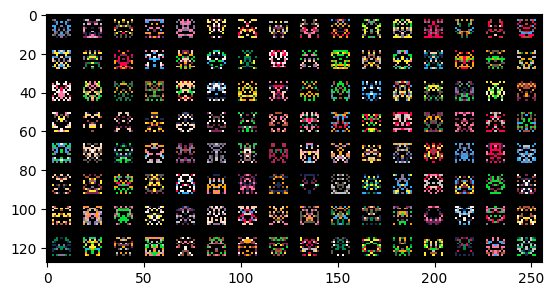

In [83]:
from random import randint, choice

PALETTE = [
    0x1D2B53,
    0x7E2553,
    0x008751,
    0xAB5236,
    0x5F574F,
    0xC2C3C7,
    0xFFF1E8,
    0xFF004D,
    0xFFA300,
    0xFFEC27,
    0x00E436,
    0x29ADFF,
    0x83769C,
    0xFF77A8,
    0xFFCCAA
]

ROW_SIZE = 16
COLUMN_SIZE = 8
SPACE = 3
SIZE = 10
COLORS_FOR_SPRITE_COUNT = 4

s = SIZE + SPACE * 2
rgb_palette = list(map(lambda color: [color >> 16, (color >> 8) & 0xFF, color & 0xFF], PALETTE))

sprites = np.zeros(s * s * COLUMN_SIZE * ROW_SIZE * 3).reshape(s * COLUMN_SIZE, s * ROW_SIZE, 3)
for i_column in range(COLUMN_SIZE):
    for i_row in range(ROW_SIZE):
        colors = np.array([choice(rgb_palette) for _ in range(COLORS_FOR_SPRITE_COUNT)])
        for i in range(SIZE):
            for j in range(SIZE):
                sprites[i_column * s + i + SPACE][i_row * s + j + SPACE] = randint(0, 1) * choice(colors)
                sprites[i_column * s + i + SPACE][i_row * s + (s - SPACE) - j - 1] = sprites[i_column * s + i + SPACE][
                    i_row * s + j + SPACE]

plt.imshow(sprites.astype('uint8'), interpolation='none')
plt.show()

**2.4.** (уровень сложности: высокий)

Слышали ли вы об играх с процедурно сгенерированными вселенными? Оказывается, у современной Elite Dangerous есть далекий предок – игра Elite 1984 года. В Elite была впечатляющая по тем временам 3d графика и целых 8 галактик для исследования, каждая из которых содержала 256 солнечных систем. Удивительно, но все это работало на 8-битном компьютере, а код игры составлял микроскопические 32 Кбайт.

Изобразите легендарную первую галактику из игры Elite. Для этого потребуется портировать алгоритм процедурной генерации, приведенный далее на C/C++. Обратите внимание, [этот код](http://www.iancgbell.clara.net/elite/text/) написан в низкоуровневом стиле, поскольку был получен из оригинальной игры, которая, в свою очередь, была написана на языке ассемблера. Вам необходимо при портировании следовать хорошему стилю написания программ на Питоне.

Каждая галактика в игре генерируется на основе всего трех 16-битных чисел w0, w1 и w2. Для первой галактики это 0x5A4A, 0x0248 и 0xB753. Имена звезд генерируются с помощью массива слогов.

```C
char pairs[] = "..LEXEGEZACEBISO"
"USESARMAINDIREA."
"ERATENBERALAVETI"
"EDORQUANTEISRION"; /* Dots should be nullprint characters */

typedef struct
{
 uint x;
 uint y; /* One byte unsigned */
 uint economy; /* These two are actually only 0-7 */
 uint govtype;
 uint techlev; /* 0-16 i think */
 uint population; /* One byte */
 uint productivity; /* Two byte */
 uint radius; /* Two byte (not used by game at all) */
 fastseedtype goatsoupseed;
 char name[12];
} plansys;

void tweakseed(seedtype *s)
{
 uint16 temp;
 temp = ((*s).w0) + ((*s).w1) + ((*s).w2); /* 2 byte aritmetic */
 (*s).w0 = (*s).w1;
 (*s).w1 = (*s).w2;
 (*s).w2 = temp;
}

/**-Generate system info from seed **/

plansys makesystem(seedtype *s)
{
 plansys thissys;
 uint pair1, pair2, pair3, pair4;
 uint16 longnameflag = ((*s).w0) & 64;

 thissys.x = (((*s).w1) >> 8);
 thissys.y = (((*s).w0) >> 8);

 thissys.govtype = ((((*s).w1) >> 3) & 7); /* bits 3,4 &5 of w1 */

 thissys.economy = ((((*s).w0) >> 8) & 7); /* bits 8,9 &A of w0 */
 if (thissys.govtype <= 1)
 {
 thissys.economy = ((thissys.economy) | 2);
 }

 thissys.techlev = ((((*s).w1) >> 8) & 3) + ((thissys.economy) ^ 7);
 thissys.techlev += ((thissys.govtype) >> 1);
 if (((thissys.govtype) & 1) == 1) thissys.techlev += 1;
 /* C simulation of 6502's LSR then ADC */

 thissys.population = 4 * (thissys.techlev) + (thissys.economy);
 thissys.population += (thissys.govtype) + 1;

 thissys.productivity = (((thissys.economy) ^ 7) + 3)*((thissys.govtype) + 4);
 thissys.productivity *= (thissys.population) * 8;

 thissys.radius = 256 * (((((*s).w2) >> 8) & 15) + 11) + thissys.x;

 thissys.goatsoupseed.a = (*s).w1 & 0xFF;;
 thissys.goatsoupseed.b = (*s).w1 >> 8;
 thissys.goatsoupseed.c = (*s).w2 & 0xFF;
 thissys.goatsoupseed.d = (*s).w2 >> 8;

 pair1 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair2 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair3 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 pair4 = 2 * ((((*s).w2) >> 8) & 31); tweakseed(s);
 /* Always four iterations of random number */

 (thissys.name)[0] = pairs[pair1];
 (thissys.name)[1] = pairs[pair1 + 1];
 (thissys.name)[2] = pairs[pair2];
 (thissys.name)[3] = pairs[pair2 + 1];
 (thissys.name)[4] = pairs[pair3];
 (thissys.name)[5] = pairs[pair3 + 1];

 if (longnameflag) /* bit 6 of ORIGINAL w0 flags a four-pair name */
 {
 (thissys.name)[6] = pairs[pair4];
 (thissys.name)[7] = pairs[pair4 + 1];
 (thissys.name)[8] = 0;
 }
 else (thissys.name)[6] = 0;
 stripout(thissys.name, '.');

 return thissys;
}
```

Описание первой галактики можно найти [здесь](https://wiki.alioth.net/index.php/Oolite_planet_list/Galaxy_1).

Ниже показан пример визуализации первой галактики.

![](../../../data/galaxy.png)

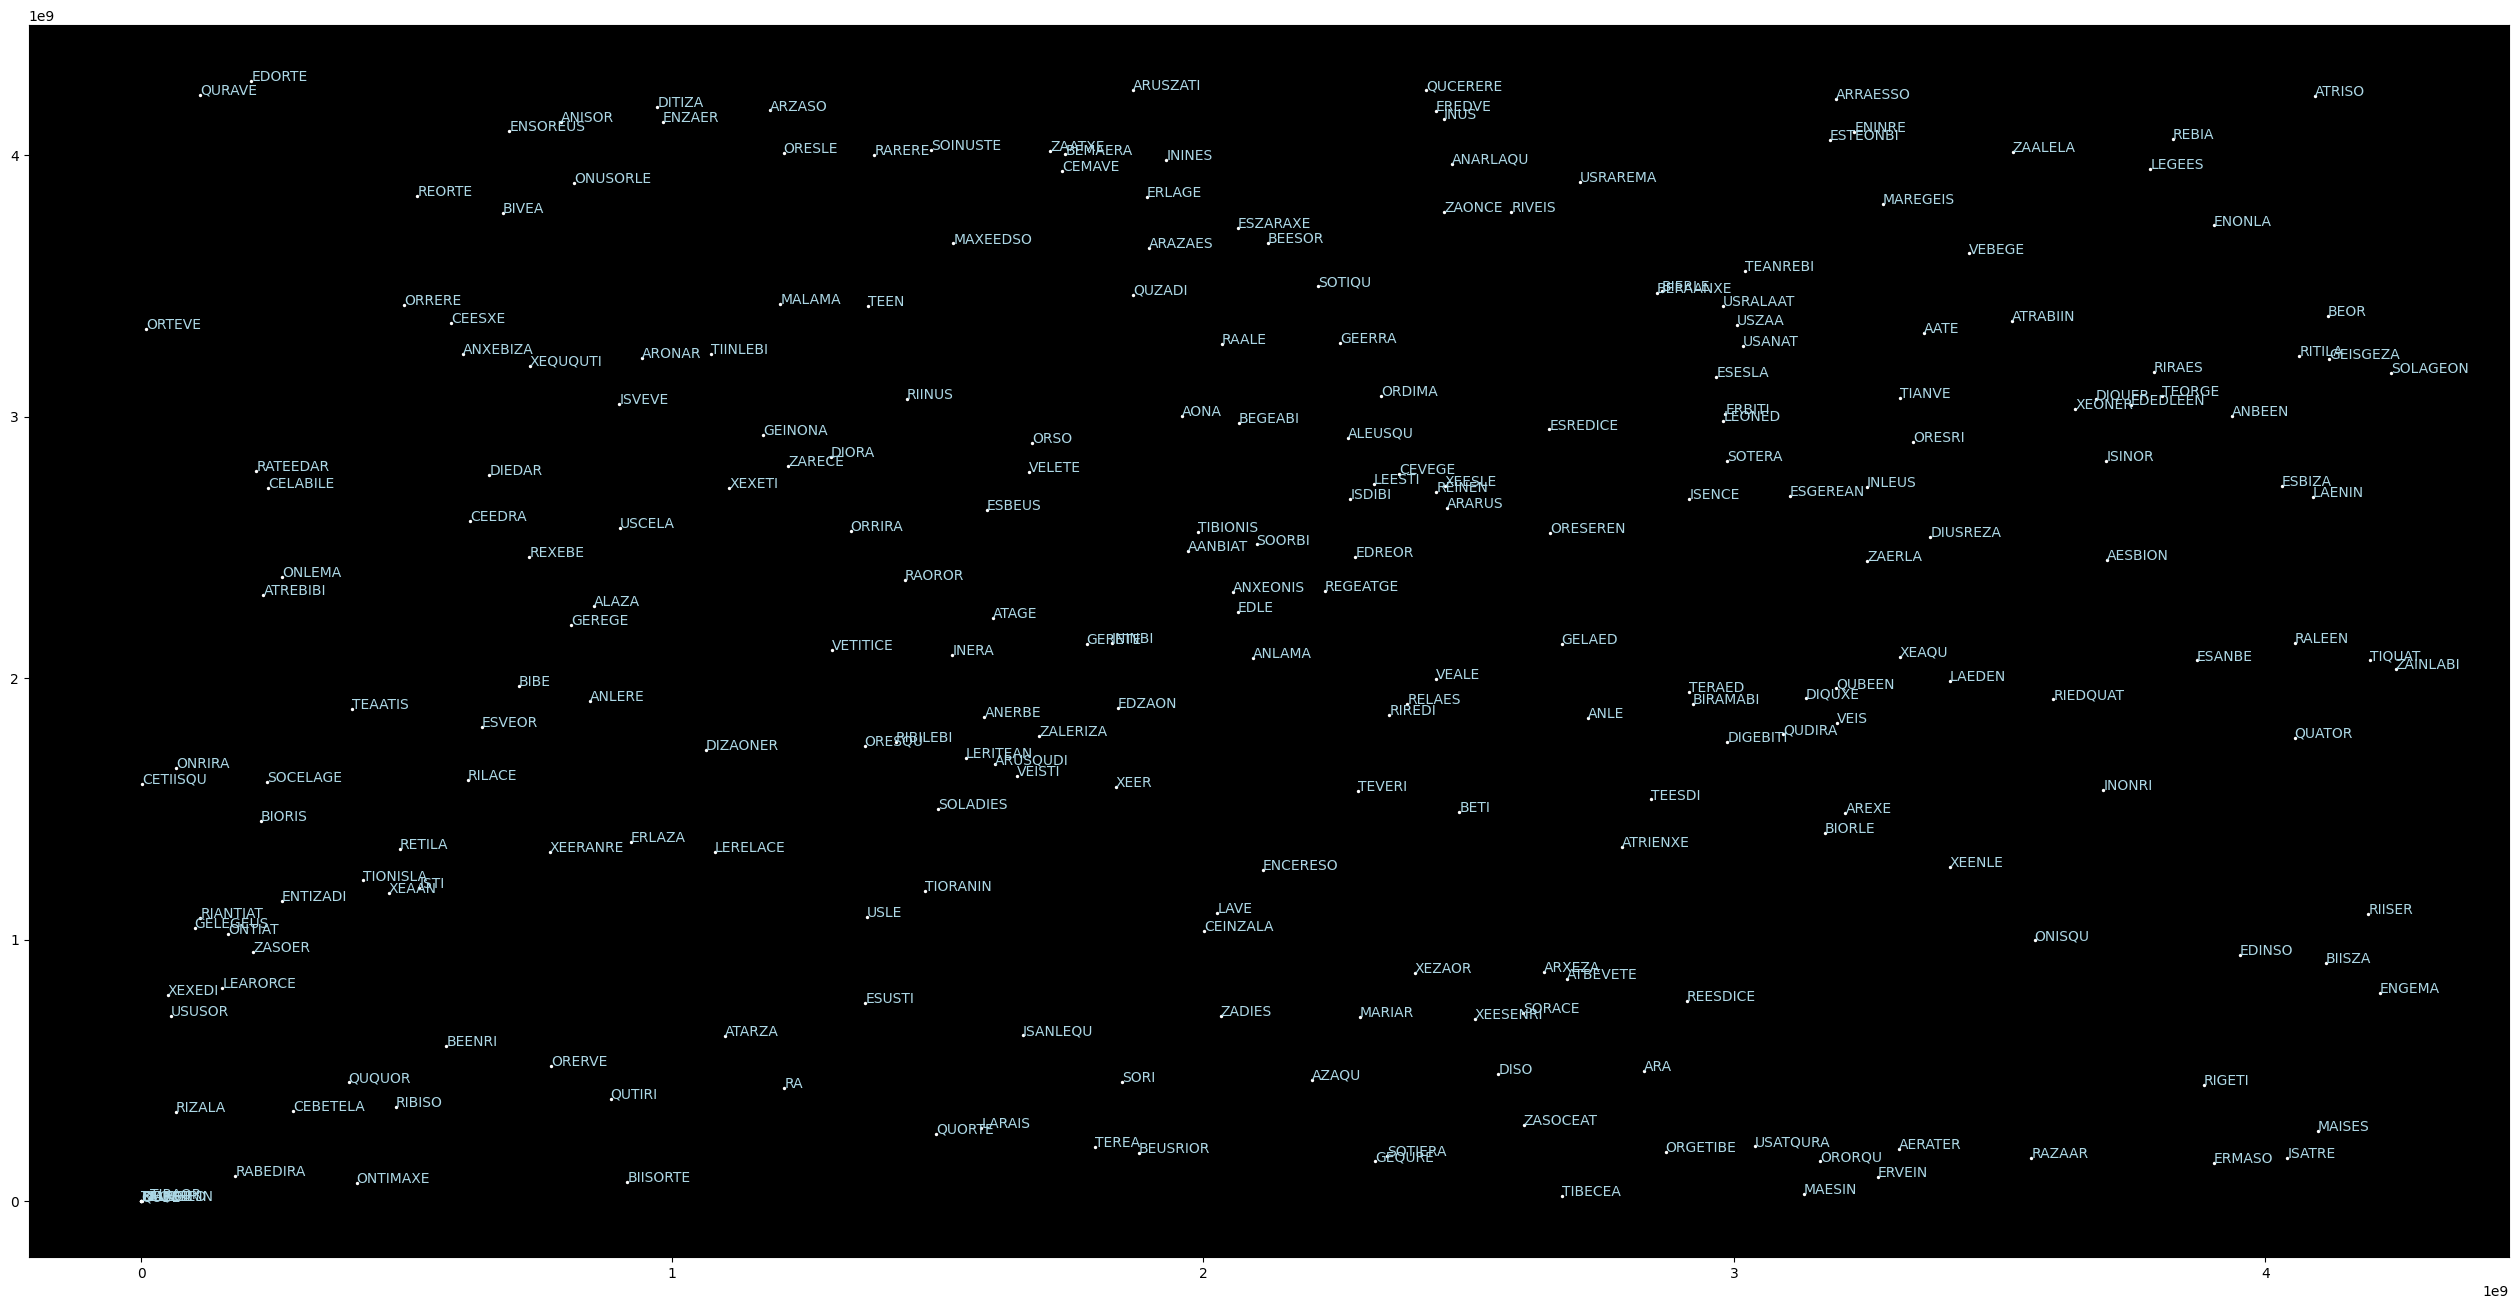

In [84]:
PAIRS = "..LEXEGEZACEBISO" \
        "USESARMAINDIREA." \
        "ERATENBERALAVETI" \
        "EDORQUANTEISRION"


class SeedType:
    def __init__(self, w0, w1, w2):
        self.w0 = w0
        self.w1 = w1
        self.w2 = w2


class FastSeedType:
    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d


class PlanSys:
    def __init__(
            self,
            x=0,
            y=0,
            economy=0,
            gov_type=0,
            tech_lev=0,
            population=0,
            productivity=0,
            radius=0,
            goat_soup_seed=FastSeedType(0, 0, 0, 0),
            name=""
    ):
        self.x = x
        self.y = y
        self.economy = economy
        self.gov_type = gov_type
        self.tech_lev = tech_lev
        self.population = population
        self.productivity = productivity
        self.radius = radius
        self.goat_soup_seed = goat_soup_seed
        self.name = name


def tweak_seed(s: SeedType):
    temp = s.w0 + s.w1 + s.w2
    s.w0 = s.w1
    s.w1 = s.w2
    s.w2 = temp


def make_system(s: SeedType):
    long_name_flag = s.w0 & 64

    this_sys = PlanSys()

    this_sys.x = (s.w1 >> 8) % 2 ** 32
    this_sys.y = (s.w0 >> 8) % 2 ** 32

    this_sys.gov_type = (s.w1 >> 3) & 7

    this_sys.economy = (s.w0 >> 8) & 7 if (this_sys.gov_type > 1) else this_sys.economy | 2

    this_sys.tech_lev = ((s.w1 >> 8) & 3) + (this_sys.economy ^ 7) + (this_sys.gov_type >> 1) + (
            this_sys.gov_type & 1 == 1)

    this_sys.population = 4 * this_sys.tech_lev + this_sys.economy + this_sys.gov_type + 1

    this_sys.radius = 256 * (((s.w0 >> 8) & 15) + 11) + this_sys.x

    this_sys.goat_soup_seed.a = s.w1 & 0xFF
    this_sys.goat_soup_seed.b = s.w1 >> 8
    this_sys.goat_soup_seed.c = s.w2 & 0xFF
    this_sys.goat_soup_seed.d = s.w2 >> 8

    pair1 = 2 * ((s.w2 >> 8) & 31)
    tweak_seed(s)
    pair2 = 2 * ((s.w2 >> 8) & 31)
    tweak_seed(s)
    pair3 = 2 * ((s.w2 >> 8) & 31)
    tweak_seed(s)
    pair4 = 2 * ((s.w2 >> 8) & 31)
    tweak_seed(s)

    this_sys.name = (PAIRS[pair1:pair1 + 2] + PAIRS[pair2:pair2 + 2] + PAIRS[pair3:pair3 + 2] + (
        PAIRS[pair4:pair4 + 2] if long_name_flag else "")).replace(".", "")

    return this_sys


seed = SeedType(0x5A4A, 0x0248, 0xB753)
systems = [make_system(seed) for i in range(256)]
xs, ys = zip(*((system.x, system.y) for system in systems))
names = [system.name for system in systems]

fig, ax = plt.subplots()
fig.set_size_inches(32, 16)
ax.scatter(xs, ys, color='white', s=2)
ax.set_facecolor("black")

for i, name in enumerate(names):
    ax.annotate(name, (xs[i], ys[i]), color='lightblue')

plt.show()

## 3. Инфографика

Проанализируйте данные, полученные от ЦАП. Для этого можно воспользоваться приведенным ниже кодом.

```Python
import csv
import datetime


def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')


def load_csv(filename):
    with open(filename, encoding='utf8') as f:
        return list(csv.reader(f, delimiter=','))


# id, task, variant, group, time
messages = load_csv('messages.csv')

# id, message_id, time, status
checks = load_csv('checks.csv')

# task, variant, group, time, status, achievements
statuses = load_csv('statuses.csv')

# О статусах см. https://github.com/kispython-ru/dta/blob/main/webapp/models.py#L44-L50
```

In [85]:
import matplotlib.pyplot as plt
import csv
import datetime
import pandas as pd


def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')


def load_csv(filename):
    with open(filename, encoding='utf8') as f:
        return list(csv.reader(f, delimiter=','))


# id, task, variant, group, time
messages = load_csv('../../../data/messages.csv')

# id, message_id, time, status
checks = load_csv('../../../data/checks.csv')

# task, variant, group, time, status, achievements
statuses = load_csv('../../../data/statuses.csv')

# О статусах см. https://github.com/kispython-ru/dta/blob/main/webapp/models.py#L44-L50

**3.1.** (уровень сложности: средний)

Как по дням недели распределяется активность студентов?

**Решение:**

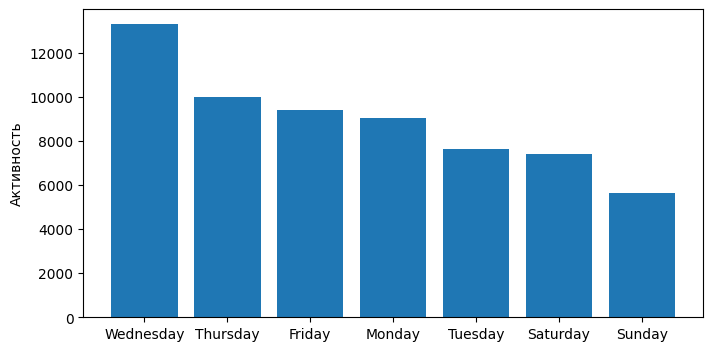

In [86]:
data = list(map(lambda x: parse_time(x[2]).strftime('%A'), checks))
data = pd.Series(data).value_counts()

plt.figure(figsize=(8, 4))
plt.bar(data.index, data)
plt.ylabel("Активность")
plt.show()

**3.2.** (уровень сложности: средний)

Как по времени суток распределяется активность студентов?

**Решение:**

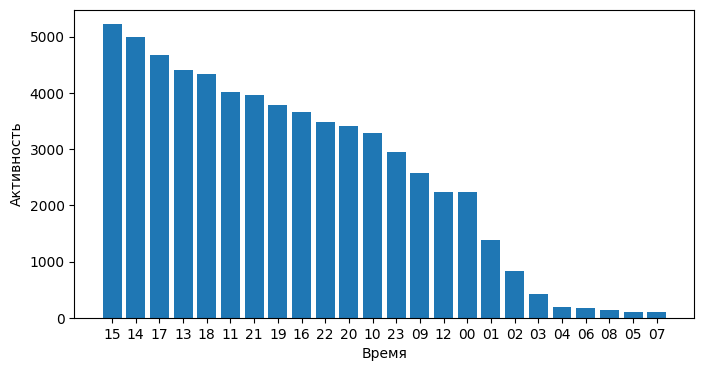

In [87]:
data = list(map(lambda x: parse_time(x[2]).strftime('%H'), checks))
data = pd.Series(data).value_counts()

plt.figure(figsize=(8, 4))
plt.bar(data.index, data)
plt.ylabel("Активность")
plt.xlabel("Время")
plt.show()

**3.5.** (уровень сложности: средний)

В каких группах было отправлено больше всего сообщений?

**Решение:**

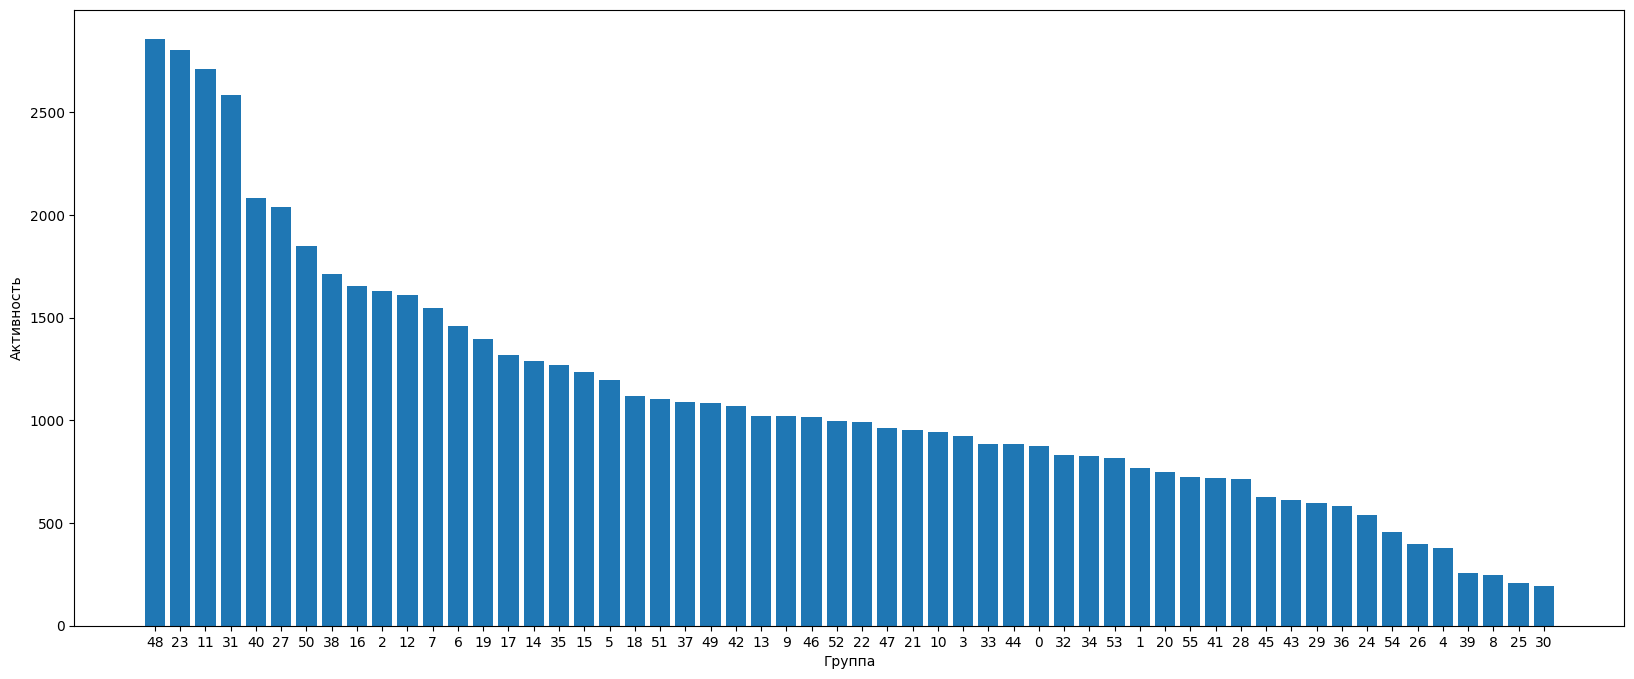

In [88]:
data = list(map(lambda x: x[3], messages))
data = pd.Series(data).value_counts()

plt.figure(figsize=(20, 8))
plt.bar(data.index, data)
plt.ylabel("Активность")
plt.xlabel("Группа")
plt.show()

**3.6.** (уровень сложности: средний)

В каких группах было получено больше всего правильных решений? 

**Решение:**

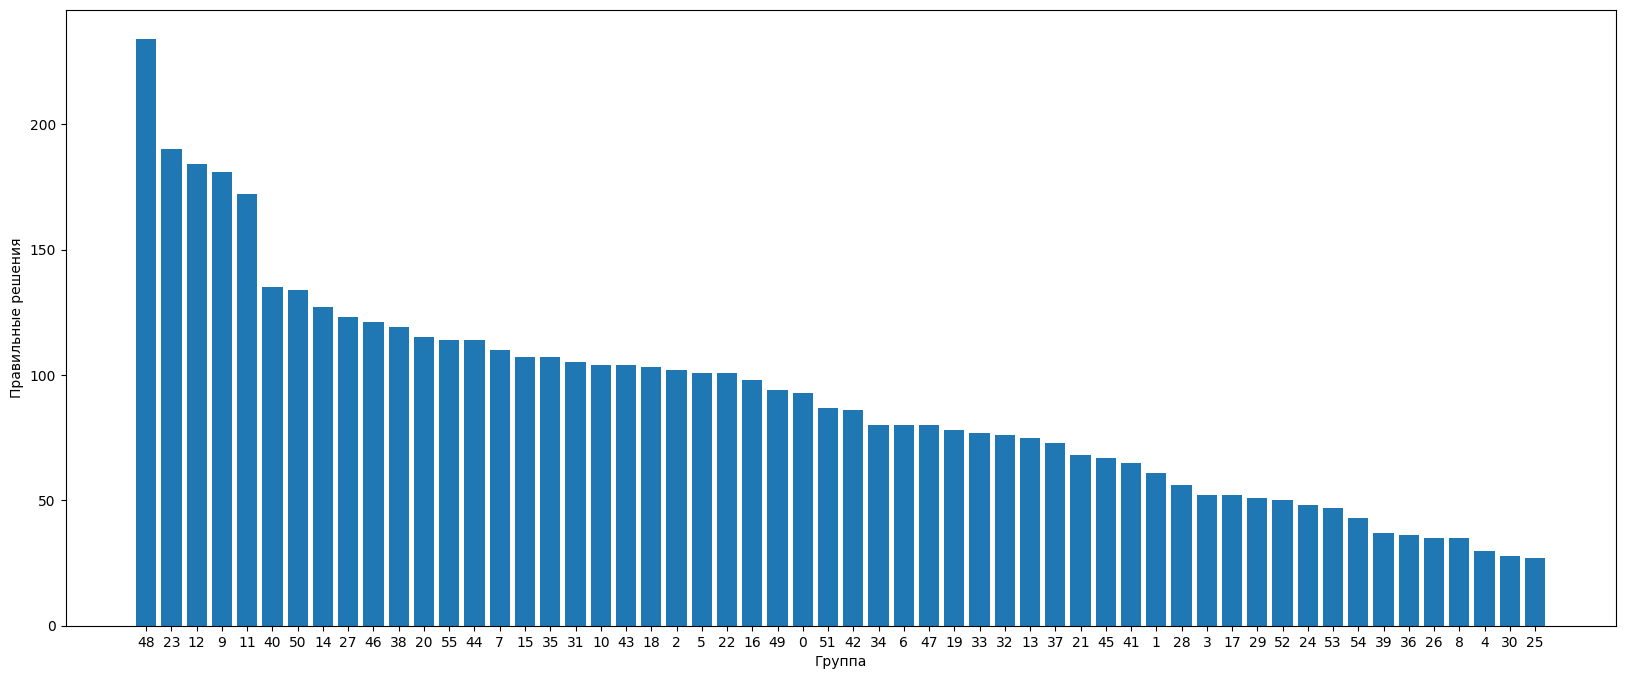

In [89]:
data = list(filter(lambda x: x[4] == "2", statuses))
data = list(map(lambda x: x[2], data))
data = pd.Series(data).value_counts()

plt.figure(figsize=(20, 8))
plt.bar(data.index, data)
plt.ylabel("Правильные решения")
plt.xlabel("Группа")
plt.show()